# Projeto 01

## Nome: Rafael Almada

### Com o aumento do IDH, o consumo de álcool e cigarro tende a cair?

O IDH (Índice de Desenvolvimento Humano) é a forma como medimos o desenvolvimento humano em cada país, logo ele é calculado a partir de dados como a educação, expectativa de vida e o PIB per capita. Porém sabemos que além disso, muitas variáveis possuem uma correlação com o IDH, sendo assim impactam indiretamente em seu valor.

O objetivo deste projeto é, por meio de uma análise descritiva de diversos Data Frames, verificar se com o aumento do IDH, o consumo de álcool e cigarro tende a diminuir.

É importante ressaltar que as bases de dados usadas foram todas retiradas do site: https://www.gapminder.org/

## Introdução

Sabe-se que o consumo de álcool e cigarro é muito utilizado, sendo a dependencia química dos mesmos muito associada a tempos difíceis. Conhecemos histórias como a de Mário de Andrade, poeta e escritor brasileiro da primeira geração do modernismo no país. Ao ver o seu amado país sob uma ditadura (Estado Novo de Getúlio Vargas, pós-1937), aquilo que ele mais repugnava, sente como se tivesse falhado em sua missão. Um movimento que falava tanto de liberdade em tantos sentidos e em se assumir uma nacionalidade própria, o tal do "Brasil brasileiro". Assim, Mário passou a beber, transformou a bebida em sua fuga da  realidade, tristeza e melancolia recaíam sobre o mesmo. Até que em 1945, já alcoólatra há alguns anos, ele morre devido a um infarto do miocárdio, o que hoje sabemos que isso só aconteceu devido ao consumo excessivo de álcool.

Já cigarros tem o mesmo peso negativo a uma pessoa, sendo no geral uma fuga ao stress. Seus efeitos são de prazer e satisfação. Sabemos também que o aumento do uso de cigarros se deve, em parte, a urbanização. Também sabemos que pode ser muito prejudicial a saúde se usado com frequencia e manter o hábito por anos.

Dado isso, podemos associar o IDH a um sentimento de satisfação com o próprio país também, sendo assim um país com maior IDH possui "menos problemas" e por isso seria uma razão para, no decorrer do tempo, haver uma diminuição no uso dessas substâncias.

In [2]:
import pandas as pd
import matplotlib.pyplot as plt

% matplotlib inline

In [3]:
alcool=pd.read_csv('alcohol_consumption.csv')
GDPcapita=pd.read_csv('gdppercapita_us_inflation_adjusted.csv')
IDH=pd.read_csv('hdi_human_development_index.csv')
life=pd.read_csv('life_expectancy_years.csv')
cigarro=pd.read_csv('smoking_adults_percent_of_population_over_age_15.csv') #singaro da cãnsir

### Join dos DataFrames!

Irei usar o ano de 2005 como referência, pois é o ano em comum entre os 3 dataframes!

In [4]:
GDP_2005=GDPcapita[['geo','2005']].copy()
IDH_2005=IDH[['geo','2005']].copy()
alc_2005=alcool[['geo','2005']].copy()
cig_2005=cigarro[['geo','2005']].copy()

In [5]:
IDH_idx=IDH_2005.set_index('geo')
alc_idx=alc_2005.set_index('geo')
cig_idx=cig_2005.set_index('geo')
GDP_idx=GDP_2005.set_index('geo')

In [6]:
IDH_alc=IDH_idx.join(alc_idx, how='inner', lsuffix='_idh', rsuffix='_alc')
IDH_cig=IDH_alc.join(cig_idx, how='inner', rsuffix='_cig')
df=IDH_cig.join(GDP_idx, how='inner', lsuffix='_cig', rsuffix='_GDP')
df.head() #dataframe pronto para a analise!

,2005_idh,2005_alc,2005_cig,2005_GDP
geo,,,,
Albania,0.696,6.68,22.4,3190.0
Algeria,0.686,0.96,15.2,4270.0
Andorra,NaN,15.50,32.9,48800.0
Argentina,0.782,10.00,30.0,8520.0
Armenia,0.692,11.30,29.6,2570.0


### Início da análise descritiva dos dados

Agora que já demos join nos dataframes, podemos começar nossa análise das variáveis e tirar alguns gráficos.

In [7]:
df.describe()

,2005_idh,2005_alc,2005_cig,2005_GDP
count,124.000000,124.000000,125.000000,125.000000
mean,0.680129,7.214758,24.670400,14185.984000
std,0.162990,4.881280,10.156319,19499.062299
min,0.303000,0.060000,4.300000,233.000000
25%,0.570000,3.172500,15.100000,1380.000000
50%,0.711000,6.705000,24.900000,4650.000000
75%,0.807000,11.025000,31.900000,18000.000000
max,0.931000,18.200000,51.800000,101000.000000


In [8]:
def Assimetria(dado): #Cálculo do coeficiente de assimetria de Bowley
    Q1=dado.quantile(0.25)
    Md=dado.quantile(0.5)
    Q3=dado.quantile(0.75)
    gb=((Q3-Md)-(Md-Q1))/(Q3-Q1)
    return gb

In [9]:
gb_idh=Assimetria(df['2005_idh'])
gb_gdp=Assimetria(df['2005_GDP'])
gb_alc=Assimetria(df['2005_alc'])
gb_cig=Assimetria(df['2005_cig'])
lista_gb={'IDH': gb_idh, 'PIB': gb_gdp, 'Álcool': gb_alc, 'Cigarro': gb_cig}

for i in lista_gb:
    print('Coeficiente de assimetria de Bowley ({0}): {1:.4f}'.format(i, lista_gb[i]))

Coeficiente de assimetria de Bowley (IDH): -0.1899
Coeficiente de assimetria de Bowley (PIB): 0.6065
Coeficiente de assimetria de Bowley (Álcool): 0.1003
Coeficiente de assimetria de Bowley (Cigarro): -0.1667


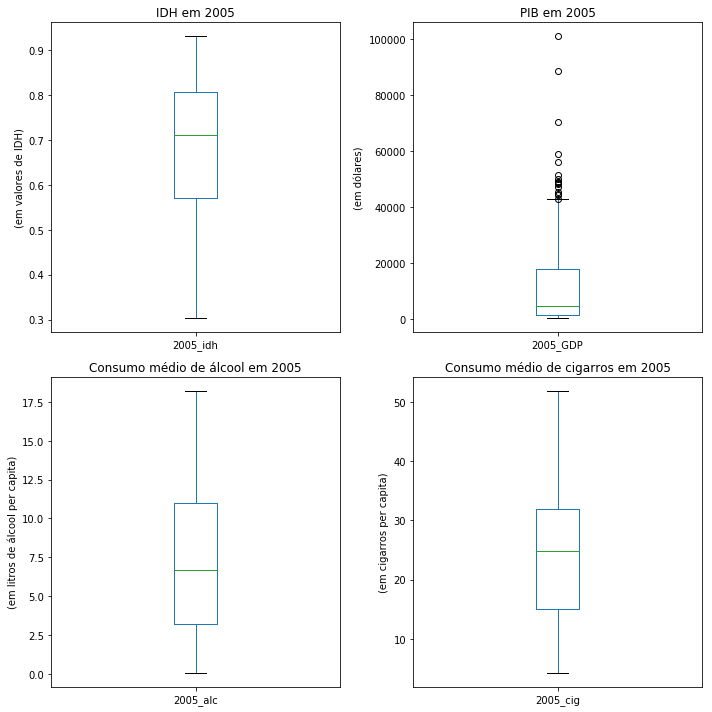

In [10]:
fig=plt.figure(figsize=(10, 10))
plt.subplot(221)
df['2005_idh'].plot(kind='box')
plt.title('IDH em 2005')
plt.ylabel('(em valores de IDH)')

plt.subplot(222)
df['2005_GDP'].plot(kind='box')
plt.title('PIB em 2005')
plt.ylabel('(em dólares)')

plt.subplot(223)
df['2005_alc'].plot(kind='box')
plt.title('Consumo médio de álcool em 2005')
plt.ylabel('(em litros de álcool per capita)')

plt.subplot(224)
df['2005_cig'].plot(kind='box')
plt.title('Consumo médio de cigarros em 2005')
plt.ylabel('(em cigarros per capita)')

plt.tight_layout()
plt.show()

Os gráficos boxplot nos apresentam a distribuição em questão e por isso são muito úteis para variáveis quantitativas. No caso todas as distribuições são pelo menos um pouco assimétricas para um lado. Porém o consumo de álcool, IDH e consumo de cigarros possuem distribuições quase que simétricas e por isso podemos considerar elas como tal (dado que não existem outliers e o coeficiente de Bowley é muito próximo do zero), mas o PIB per capita, devido ao fato de estarmos estudando todos os países no mesmo gráfico, percebemos que há muita desigualdade na posse de dinheiro entre os países, a maior prova disso é a mediana ser 3 vezes menor que a média, sendo uma assimetria para a direita ou positiva.

In [11]:
Corr_A=df.corr(method='pearson')['2005_alc']['2005_idh'] #Correlação entre as colunas Álcool e IDH
Corr_C=df.corr(method='pearson')['2005_cig']['2005_idh'] #Correlação entre as colunas Cigarro e IDH

print('Correlação entre Álcool e IDH: {0:.6f}'.format(Corr_A))
print('Correlação entre Cigarro e IDH: {0:.6f}'.format(Corr_C))

Correlação entre Álcool e IDH: 0.522197
Correlação entre Cigarro e IDH: 0.573793


Para podermos ter certeza de que nossa análise faz algum sentido, devemos analisar a correlação entre as variáveis em questão. Como no caso quero saber se o consumo de álcool e cigarros interferem no valor do IDH, devo verificar se a correlação entre 'Álcool x IDH' e 'Cigarro x IDH' é diferente de 0.

No caso, percebemos na célula acima que ambas são correlações positivas e com isso provamos que essas taxas interferem sim no IDH. Mas, para uma melhor análise, vamos analisar graficamente o que está acontecendo com o auxílio de um gráfico de dispersão ou scatterplot.

Reta 1 (IDH x Álcool)
Ajuste linear entre X3 e X4:
Coeficiente linear: -3.3285478967574686
Coeficiente angular: 15.501920166926652
----------------------------------------
Reta 2 (IDH x Cigarro)
Ajuste linear entre X3 e X4:
Coeficiente linear: 0.31931508926335184
Coeficiente angular: 35.80362512961659
----------------------------------------


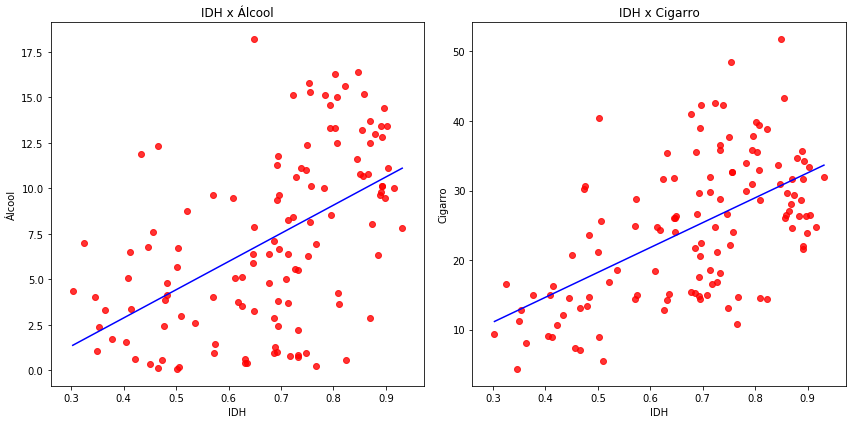

In [14]:
#Utilizarei da função elaborada pelo professor nessa parte
#Função do professor retirada de: https://pastebin.com/0KcDyqKq
#A partir da função, a otimizei para uma melhor visualização de dois gráficos em uma só célula
def retas(dados_x1, dados_y1, eixo_x1, eixo_y1, title1, dados_x2, dados_y2, eixo_x2, eixo_y2, title2):    
    a1 = dados_y1.cov(dados_x1) / dados_x1.var()
    b1 = dados_y1.mean() - a1*dados_x1.mean()
    
    a2 = dados_y2.cov(dados_x2) / dados_x2.var()
    b2 = dados_y2.mean() - a2*dados_x2.mean()
    
    print('Reta 1 ({0})'.format(title1))
    print('Ajuste linear entre X3 e X4:')
    print('Coeficiente linear:', b1)
    print('Coeficiente angular:', a1)
    print('-'*40)
    print('Reta 2 ({0})'.format(title2))
    print('Ajuste linear entre X3 e X4:')
    print('Coeficiente linear:', b2)
    print('Coeficiente angular:', a2)
    print('-'*40)

    fig = plt.figure(figsize=(12, 6))
    plt.subplot(121)
    plt.scatter(dados_x1, dados_y1, c='red', alpha=0.8)
    plt.title(title1)
    plt.xlabel(eixo_x1)
    plt.ylabel(eixo_y1)

    plt.plot((dados_x1.min(), dados_x1.max()), (a1*dados_x1.min()+b1, a1*dados_x1.max()+b1), color='blue')
    
    plt.subplot(122)
    plt.scatter(dados_x2, dados_y2, c='red', alpha=0.8)
    plt.title(title2)
    plt.xlabel(eixo_x2)
    plt.ylabel(eixo_y2)
    
    plt.plot((dados_x2.min(), dados_x2.max()), (a2*dados_x2.min()+b2, a2*dados_x2.max()+b2), color='blue')
    
    plt.tight_layout()
    plt.show()
    
retas(df['2005_idh'],df['2005_alc'],'IDH','Álcool','IDH x Álcool',df['2005_idh'], df['2005_cig'],'IDH','Cigarro','IDH x Cigarro')

Os gráficos na célula acima nos mostram que a dispersão é realmente positiva e ambas são muito parecidas, logo podemos assumir que influenciam o IDH quase que igualmente! O próximo passo é verificar a correlação entre o consumo de álcool e o consumo de cigarro, pois é importante saber o quanto essas variáveis "andam" juntas.


Reta 1 (Álcool x Cigarro)
Ajuste linear entre X3 e X4:
Coeficiente linear: 16.986926745764087
Coeficiente angular: 1.0649661687236667
----------------------------------------


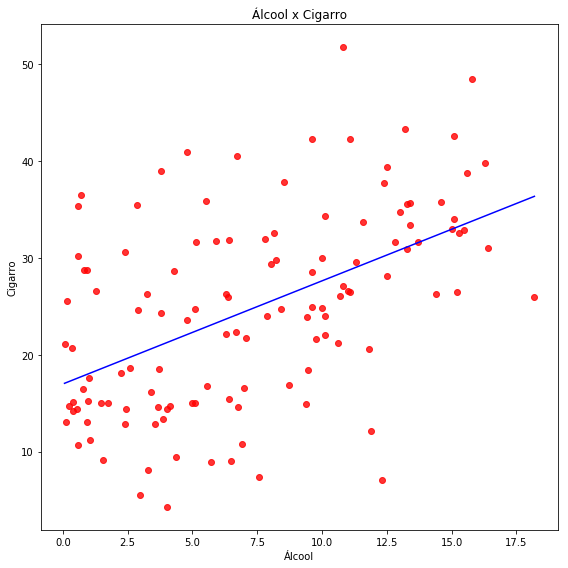

In [13]:
#Usando novamente a função do professor, mas dessa vez só para um gráfico!
def reta(dados_x1, dados_y1, eixo_x1, eixo_y1, title1):
    a1 = dados_y1.cov(dados_x1) / dados_x1.var()
    b1 = dados_y1.mean() - a1*dados_x1.mean()
    
    print('Reta 1 ({0})'.format(title1))
    print('Ajuste linear entre X3 e X4:')
    print('Coeficiente linear:', b1)
    print('Coeficiente angular:', a1)
    print('-'*40)
    
    fig = plt.figure(figsize=(8, 8))
    plt.scatter(dados_x1, dados_y1, c='red', alpha=0.8)
    plt.title(title1)
    plt.xlabel(eixo_x1)
    plt.ylabel(eixo_y1)
    plt.plot((dados_x1.min(), dados_x1.max()), (a1*dados_x1.min()+b1, a1*dados_x1.max()+b1), color='blue')
    plt.tight_layout()
    plt.show()

print()
reta(df['2005_alc'], df['2005_cig'], 'Álcool', 'Cigarro', 'Álcool x Cigarro')

O gráfico de dispersão entre o consumo de Álcool e Cigarro nos mostra que eles tão muito relacionados um ao outro, o que já era esperado, isso só de comparar o coeficiente angular que obtivemos com o dos outros dois gráficos relacionando cada variável ao IDH. 



c:\users\rafaa\appdata\local\programs\python\python36-32\lib\site-packages\numpy\core\_methods.py:29: RuntimeWarning: invalid value encountered in reduce
  return umr_minimum(a, axis, None, out, keepdims)
c:\users\rafaa\appdata\local\programs\python\python36-32\lib\site-packages\numpy\core\_methods.py:26: RuntimeWarning: invalid value encountered in reduce
  return umr_maximum(a, axis, None, out, keepdims)


ValueError: max must be larger than min in range parameter.

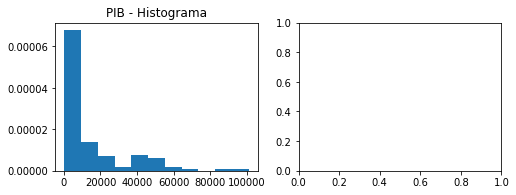

In [38]:
import math

n=len(df)
nbins=round(math.sqrt(n))
fig=plt.figure(figsize=(8,6))

plt.subplot(221)
plt.hist(df['2005_GDP'], normed=True, bins=nbins)
plt.title('PIB - Histograma')

plt.subplot(222)
plt.hist(df['2005_idh'], normed=True, bins=nbins)
plt.title('IDH - Histograma')

plt.subplot(223)
plt.hist(df['2005_alc'], normed=True, bins=nbins)
plt.title('Consumo de Álcool - Histograma')

plt.subplot(224)
plt.hist(df['2005_cig'], normed=True, bins=nbins)
plt.title('Consumo de Cigarro - Histograma')

plt.show()

## Conclusão

Voltando a questão inicial do projeto, o consumo de álcool e cigarro influenciam no IDH de um país? E o aumento do IDH causa uma queda no consumo de tais "drogas"?

Ao analisar os dados percebemos que sim! O IDH é influenciado indiretamente pelo consumo de álcool e cigarro. Mas apesar disso, ele